In [104]:
import matplotlib.pyplot as plt
import random
import numpy as np
import networkx as nx
import math

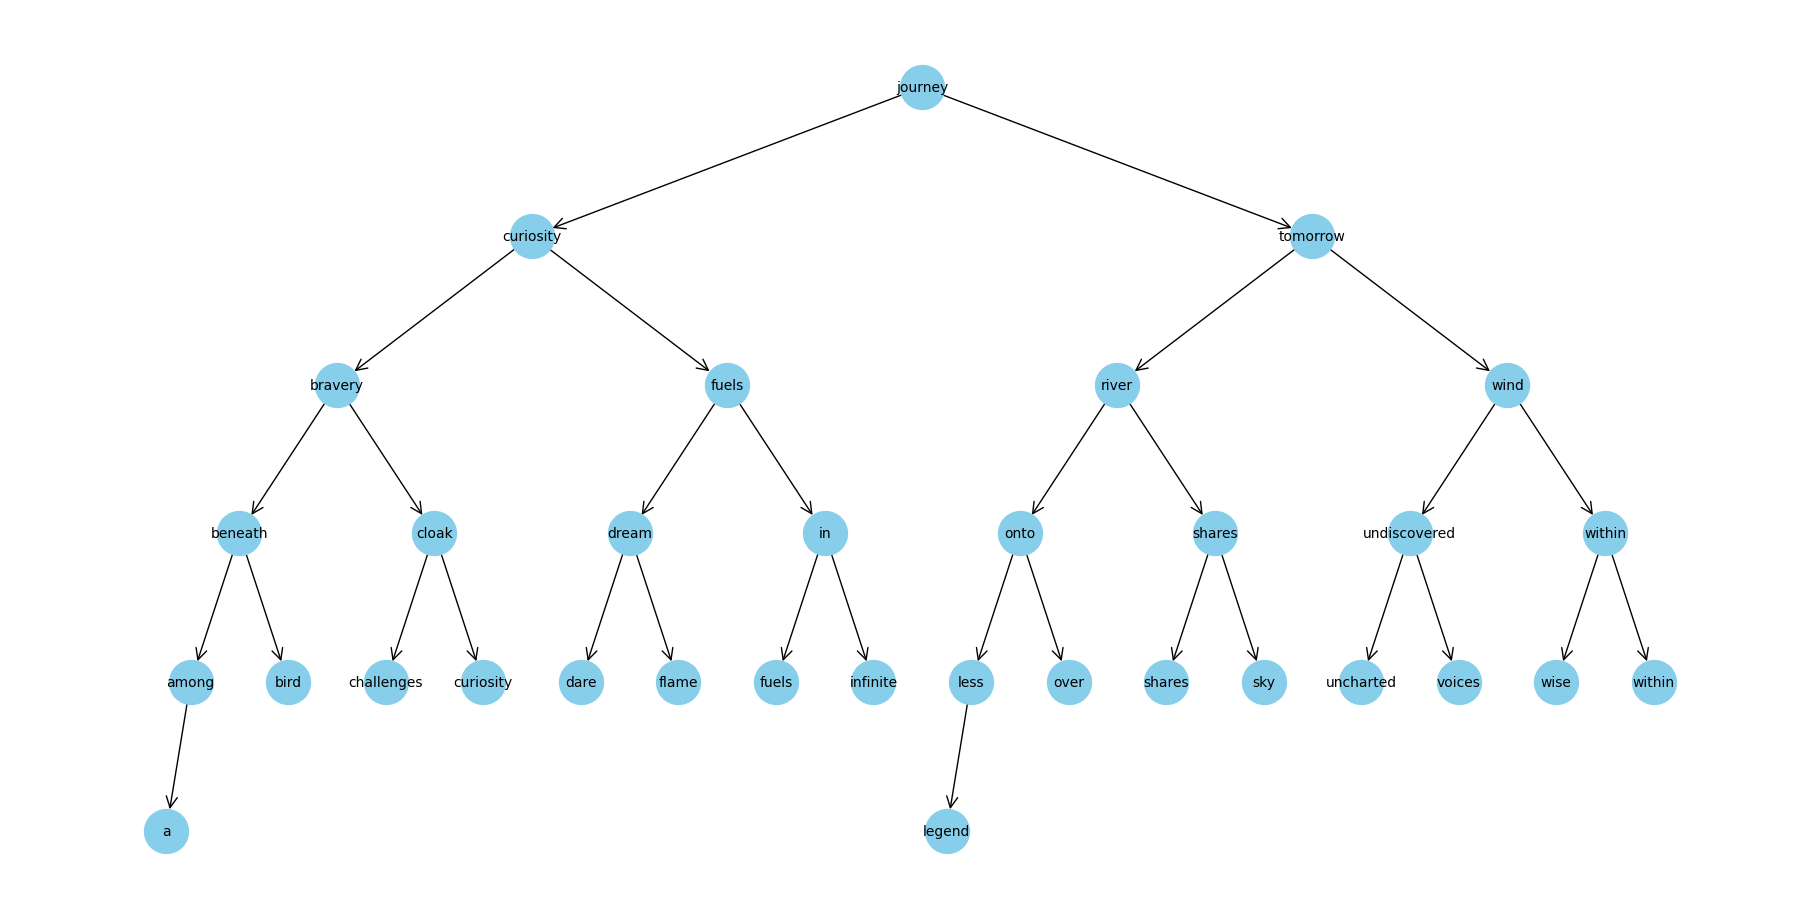

In [180]:
sentence_dict = []


subjects = [
    "The quick brown fox", "Patience", "A single idea", "The wise owl",
    "Every seashell", "Curiosity", "Bravery", "The whispering wind",
    "The early bird", "Legends", "The wandering river", "A fleeting shadow",
    "The lone wolf", "An ancient tree", "The last star", "A forgotten melody",
    "The restless sea", "A distant memory", "The dancing flame", "An old legend"
]

verbs = [
    "jumps over", "harbors", "sparks", "shares its", "whispers",
    "fuels", "is the first step on", "carries", "finds", "awake in",
    "illuminates", "challenges", "embraces", "conceals", "reveals",
    "echoes through", "wanders", "stands against", "holds onto", "dreams of"
]

objects = [
    "lazy doubts", "great rewards", "a journey of infinite possibilities", "wisdom",
    "secrets of the deep", "the adventures", "the path to undiscovered wonders",
    "tales of ancient mysteries", "the treasures of tomorrow", "the whispers of the ancient trees",
    "unspoken truths", "hidden fears", "forgotten worlds", "eternal questions",
    "silent voices", "endless horizons", "the edge of the world", "the heart of the storm",
    "the fabric of reality", "the course of fate"
]

complements = [
    "under a moonlit sky", "for those who dare to dream", "with every step",
    "in the garden of curiosity", "to those who listen", "in the heart of the storm",
    "among the uncharted dreams", "with open eyes", "in the melody of nature", "through the strings of time",
    "beyond the veil of night", "under the ancient sun", "across the sands of time",
    "along the path less traveled", "beneath the endless sky", "within the hidden depths",
    "across the silent seas", "before the world awakes", "beneath the cloak of shadows", "within the whispering winds"
]


# Generating 200 sentences
for _ in range(1000):
    subject = random.choice(subjects)
    verb = random.choice(verbs)
    object_ = random.choice(objects)
    complement = random.choice(complements)
    sentence = f"{subject} {verb} {object_} {complement}."
    sentence_dict.append(sentence)


all_words = " ".join(sentence_dict).replace(",", "").replace(".", "").split()
words_dict = list(set(all_words))

def generate_array(size, type='int', min="empty", max="empty", unique=False):
    if type == 'Int':
        return generate_int_array(size, min, max, unique)
    elif type == 'String_Sentences':
        return generate_words_array(size, unique)
    elif type == 'String_words':
        return generate_sentences_array(size, unique)
    elif type == 'Char':
        return generate_chars_array(size, unique)
    elif type == 'Bool':
        return [random.choice([True, False]) for _ in range(size)]
    elif type == 'Real':
        return generate_real_array(size, min, max, unique)
    else:
        raise ValueError("Unsupported array type")

def generate_int_array(size, min = "empty", max = "empty", unique = False):
    peak = size // 2
    if min == "empty" or not isinstance(min, int):
        min = - peak
    if max == "empty" or not isinstance(max, int):
        max = peak
    if unique:
        if max - min + 1 < size:
            raise ValueError("Range between min and max is too small for the requested unique array length.")
        return random.sample(range(min, max + 1), size)
    else:
        return [random.randint(min, max) for _ in range(size)]

def generate_words_array(size, unique = False):
    if unique and size <= len(words_dict):
        return random.sample(words_dict, size)
    else:
        return [random.choice(words_dict) for _ in range(size)]

def generate_sentences_array(size, unique = False):
    if unique:
        unique_sentences = list(set(sentence_dict))  # Ensure sentences are unique by converting to set
        if size <= len(unique_sentences):
            return random.sample(unique_sentences, size)
        else:
            raise ValueError("Not enough unique sentences for the requested size.")
    else:
        return [random.choice(sentence_dict) for _ in range(size)]

def generate_chars_array(size, unique = False):
    chars = list(set("".join(words_dict)))  # Unique characters from all words
    if unique:
        if size <= len(chars):
            return random.sample(chars, size)
        else:
            raise ValueError("Not enough unique characters for the requested size.")
    else:
        return [random.choice(chars) for _ in range(size)]

def generate_bool_array(size):
    return [random.choice([True, False]) for _ in range(size)]

def generate_real_array(size,  min = "empty", max = "empty", unique = False):
    peak = size / 2
    if min == "empty" or not isinstance(min, (int, float)):
        min = -peak
    if max == "empty" or not isinstance(max, (int, float)):
        max = peak
    if unique:
        unique_reals = set()
        while len(unique_reals) < size:
            unique_reals.add(random.uniform(min, max))
        return list(unique_reals)
    else:
        return [random.uniform(min, max) for _ in range(size)]

def generate_sample(arr_type='int'):
    samples = [1, 10, 100, 1000, 10000]
    
    res = []
    for size in samples:
        if arr_type == 'Int':
            array = generate_int_array(size)
        elif arr_type == 'String_Words':
            array = generate_words_array(size)
        elif arr_type == 'String_Sentences':
            sample = size / 10 if size != 10 or size != 1 else 10
            array = generate_sentences_array(sample)
        elif arr_type == 'Char':
            array = generate_chars_array(size)
        elif arr_type == 'Bool':
            array = generate_bool_array(size)
        elif arr_type == 'Real':
            array = generate_real_array(size)
        else:
            raise ValueError("Unsupported array type")
        res.append(array)
        
    return res


def is_sorted(lst):
    return all(lst[i] <= lst[i+1] for i in range(len(lst)-1))


def o_graph(n_o_pairs):
    x_funcs = np.arange(1, max(n_o_pairs)[0] + 1)
    y_linear = x_funcs
    y_quadratic = x_funcs**2
    y_logarithmic = np.log(x_funcs)
    y_linear_log = x_funcs * np.log(x_funcs)
    y_exponential = 2**x_funcs

    for i in range(1, len(y_exponential)):
        y_exponential[i] = max(y_exponential[i], y_exponential[i-1])

    plt.figure(figsize=(10, 6))

    plt.plot(x_funcs, y_linear, label='O(n)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_quadratic, label='O(n^2)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_logarithmic, label='O(log n)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_linear_log, label='O(n log n)', linewidth=2 ,alpha=0.5)
    plt.plot(x_funcs, y_exponential, label='O(2^n)', linewidth=2 ,alpha=0.5)

    n, o = zip(*n_o_pairs)
    plt.plot(n, o, marker='o', color='green',  linewidth=2, label='Result', zorder=5, markersize=5)

    plt.title('Algorithm Complexity Graph')
    plt.xlabel('Input Size (n)')
    plt.ylabel('Number of Operations')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1, max(x_funcs))
    plt.ylim(1, max(o))
    plt.legend()

    plt.show()


plt.ion()

def visualize_sort(steps):
    print(steps[-1])
    plt.figure(figsize=(5, 4))
    global_min = min(min(s) for s in steps)
    global_max = max(max(s) for s in steps)

    for i, step in enumerate(steps):
        plt.cla()

        plt.ylim(global_min - 1, global_max + 1)
        plt.xticks([])
        plt.yticks([])
        plt.bar(range(len(step)), [0.05 if val == 0 else val for val in step], color='skyblue')
        plt.xlabel(f"Step {i}")
        plt.pause(0.5)

    plt.show()


def add_edges(G, parent_name, node_idx, array, pos, x=0, y=0, level=1):
    if array[node_idx] != -1:
        node_name = 'node_' + str(node_idx)
        G.add_node(node_name, value=array[node_idx])
        pos[node_name] = (x, y)
        if parent_name:
            G.add_edge(parent_name, node_name)
    
        left_idx = 2 * node_idx + 1
        right_idx = 2 * node_idx + 2
    
        width = 10 * 1 / (2 ** (level ))
        if left_idx < len(array):
            add_edges(G, node_name, left_idx, array, pos, x - width, y - 1, level + 1)
        if right_idx < len(array):
            add_edges(G, node_name, right_idx, array, pos, x + width, y - 1, level + 1)

def plot_binary_tree(array):
    array = rearrange_via_binary_search(array)
    G = nx.DiGraph()
    pos = {}
    add_edges(G, None, 0, array, pos)
    labels = {node: G.nodes[node]['value'] for node in G.nodes()}
    depth = math.ceil(math.log2(len(array) + 1))
    fig_width = max(10, depth * 3)  # Ensure minimum width and scale with depth
    fig_height = depth * 1.5  # Height can be smaller than width

    plt.figure(figsize=(fig_width, fig_height))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=1000, node_color='skyblue', font_size=10, arrowstyle="->", arrowsize=20)
    plt.show()


def get_middle(arr):
    return arr[len(arr) // 2]

def split_arr(arr):
    mid = len(arr) // 2
    return (arr[0:mid], arr[mid + 1:])


def helper(arr, res):
    step = []
    stop = True
    for i in arr:
        c = len(i)
        if c != 0:
            res.append(get_middle(i))
        else:
            res.append(-1)
        if len(i) > 1:
            (lpart, rpart) = split_arr(i)
            step.append(lpart)
            step.append(rpart)
            stop = False
        elif len(i) == 1:
            (lpart, rpart) = ([], [])
            step.append(lpart)
            step.append(rpart)

    if not stop:
        helper(step, res)

def rearrange_via_binary_search(array):
    array.sort()
    res = []
    helper([array], res)
    return res


test = ['a',
        'among',
        'beneath',
        'bird',
        'bravery',
        'challenges',
        'cloak',
        'curiosity',
        'curiosity',
        'dare',
        'dream',
        'flame',
        'fuels',
        'fuels',
        'in',
        'infinite',
        'journey',
        'legend',
        'less',
        'onto',
        'over',
        'river',
        'shares',
        'shares',
        'sky',
        'tomorrow',
        'uncharted',
        'undiscovered',
        'voices',
        'wind',
        'wise',
        'within',
        'within']

rearrange_via_binary_search(test)

plot_binary_tree(test)

In [169]:
def linear_search(array, value):
    count = 0
    for i in range(len(array)):
        if array[i].lower() == value.lower():
            count += 1
    return count

In [162]:
def binary_search(array, value):
    # implemnt quicksort
    array = [element.lower() for element in array]
    array.sort()
    length = len(array)
    start = 0
    end = length - 1
    while start <= end:
        index = (start + end) // 2
        if array[index] == value:
            return index
        elif array[index] < value:
            start = index + 1
        else:
            end = index - 1

def count_binary(array, value):
    res = 0
    length = len(array)
    indexl = indexr = binary_search(array, value)
    if indexl is None:
        return 0
    while True:
        if array[indexl] == value:
            res +=1
            indexl -= 1
        else:
            break
    while True:
        if array[indexr + 1] == value and indexr != length - 1:
            res +=1
            indexr += 1
        else:
            break
    return res

b = ['wolf',
     'wolf',
     'wonders',
     'wonders',
     'wonders',
     'wonders',
     'world',
     'world',
     'world',
     'world',
     'world',
     'worlds',
     'worlds',
     'worlds',
     'worlds']

print(count_binary(b, "world"))

0


In [37]:
array = ['ant', 'bee', 'bird', 'cat', 'dog', 'fox', 'mouse', 'wolf']
rearranged_array = rearrange_via_binary_search(array)
print(rearranged_array)


['dog', 'bird', 'mouse', 'bee', 'cat', 'fox', 'wolf', 'ant']


['ant', 'bee', 'bird', 'cat', 'dog', 'fox', 'mouse', 'wolf']


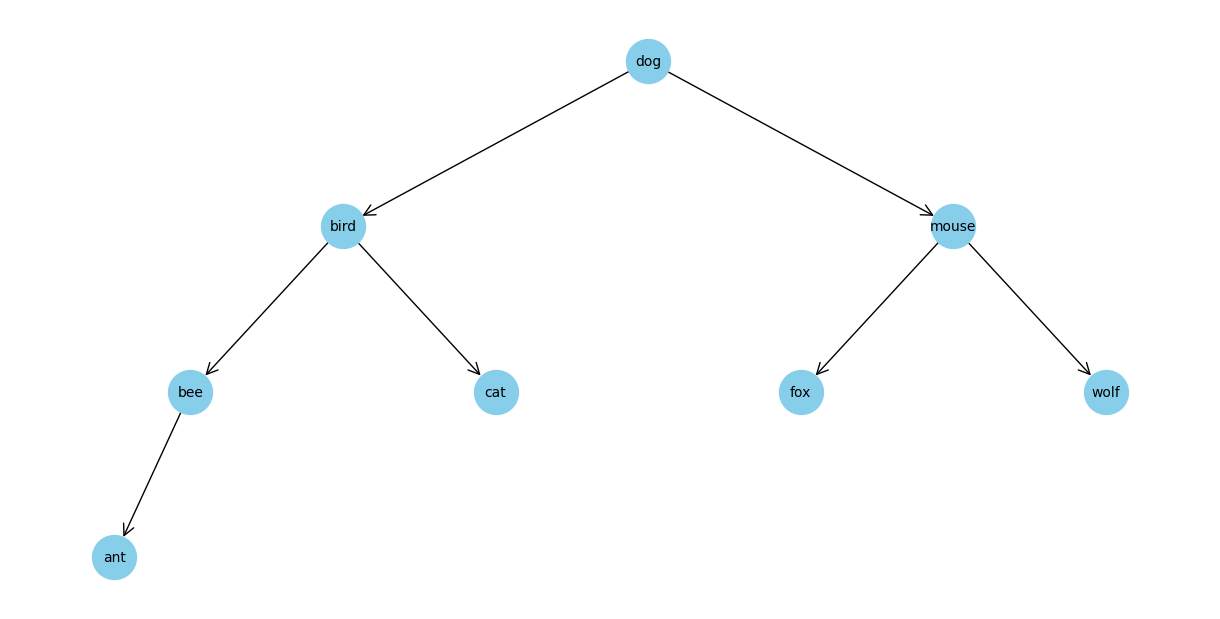

In [119]:

# This function adds edges to the graph G for each node


# Example array
# array = ['wolf', 'fox', 'cat', 'mouse', 'bird', 'ant', 'bee']

array = ['ant', 'bee', 'bird', 'cat', 'dog', 'fox', 'mouse', 'wolf']

array.sort()

print(array)

rearranged_array = rearrange_via_binary_search(array)

plot_binary_tree(rearranged_array)


In [182]:
a = generate_words_array(50)

a = [element.lower() for element in a]
a.sort()

a

['adventures',
 'against',
 'against',
 'among',
 'among',
 'among',
 'an',
 'an',
 'awakes',
 'before',
 'before',
 'bird',
 'bird',
 'bird',
 'challenges',
 'cloak',
 'course',
 'curiosity',
 'curiosity',
 'depths',
 'dreams',
 'eyes',
 'first',
 'hidden',
 'journey',
 'less',
 'mysteries',
 'nature',
 'open',
 'over',
 'patience',
 'questions',
 'reality',
 'rewards',
 'river',
 'sands',
 'seas',
 'sparks',
 'star',
 'storm',
 'the',
 'traveled',
 'trees',
 'truths',
 'unspoken',
 'unspoken',
 'whispers',
 'wolf',
 'wonders',
 'worlds']

In [185]:
c = linear_search(array=a, value='unspoken')
d = count_binary(array=a, value='unspoken')

print(f"linear: {c} binary: {d}")

linear: 2 binary: 2


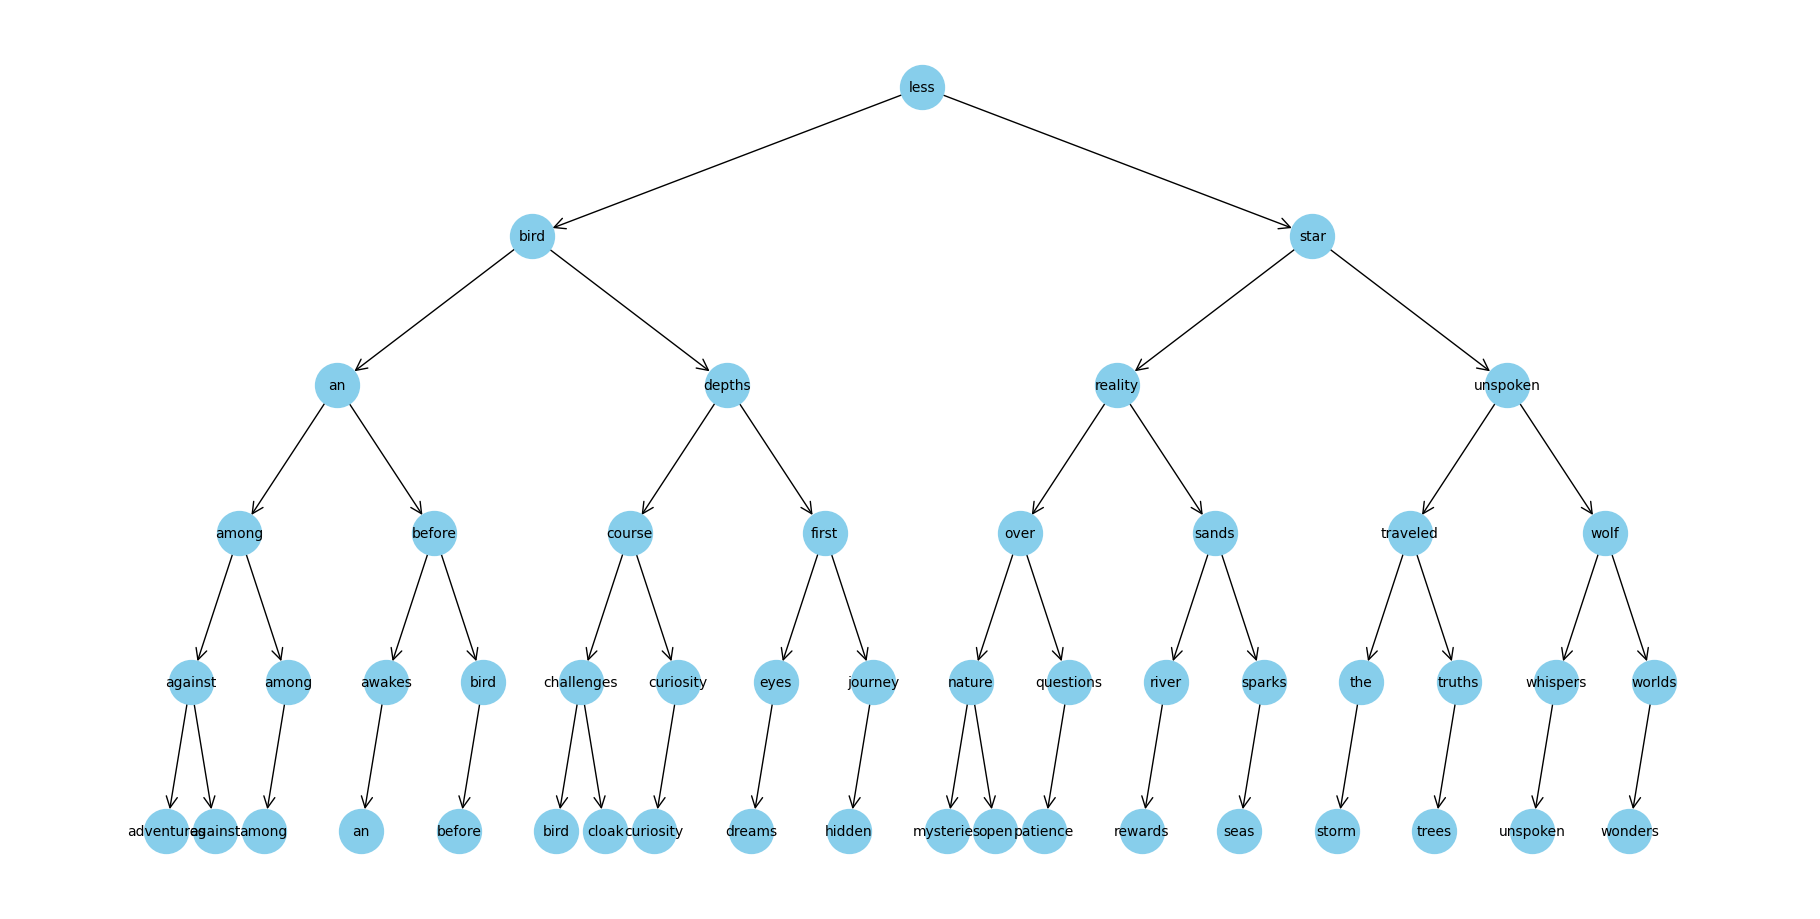

In [184]:
plot_binary_tree(a)

In [186]:
"a" == "а"

False

In [149]:
"fabric" < "every"

False

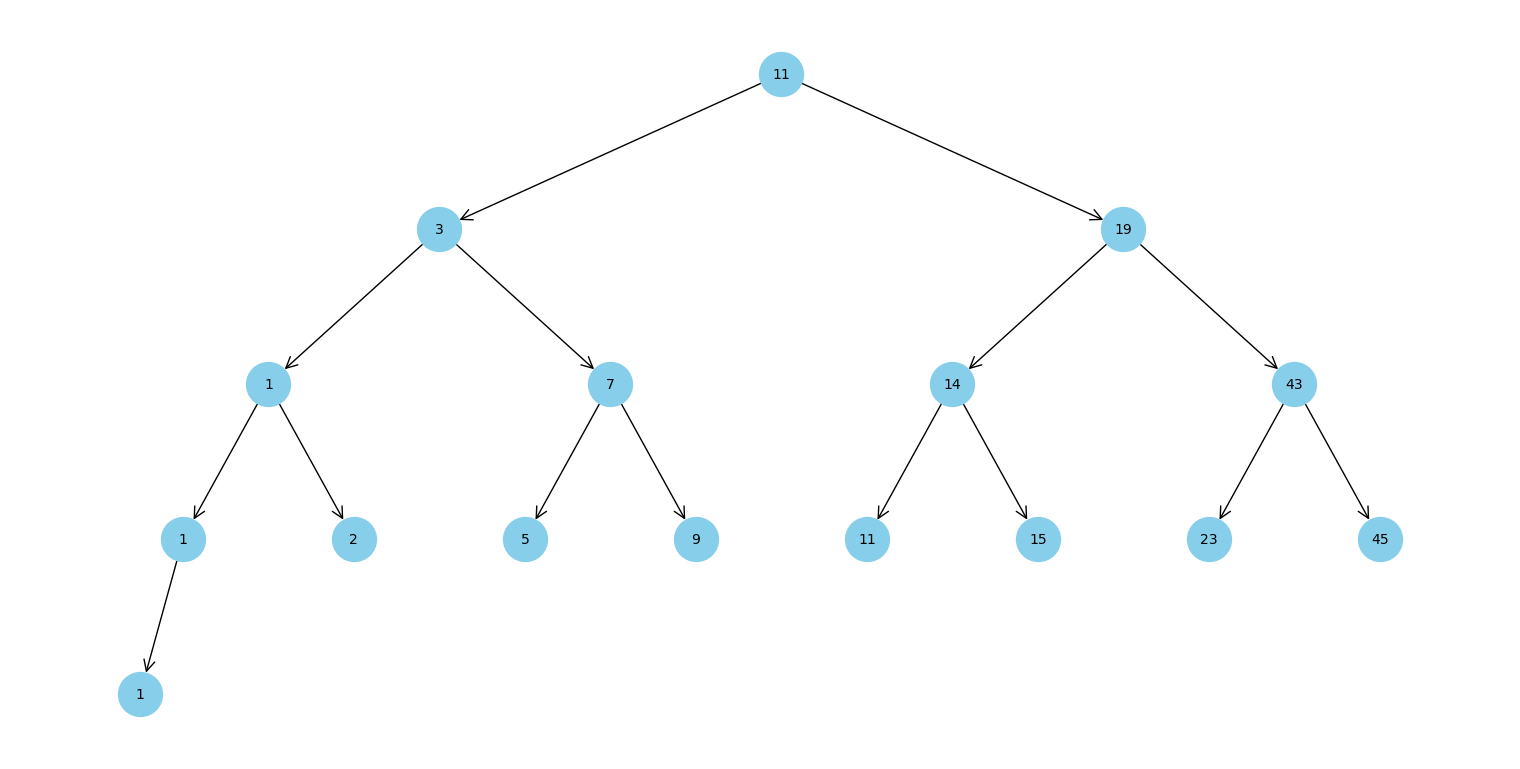

In [145]:
b = [1,1,1,2,3,5,7,9,11,11,14,15,19,23,43,45]

plot_binary_tree(b)

In [151]:
test = ['bird',
        'early',
        'every',
        'fabric',
        'great',
        'legend',
        'step',
        'unspoken',
        'winds',
        'winds']

is_sorted(test)

True

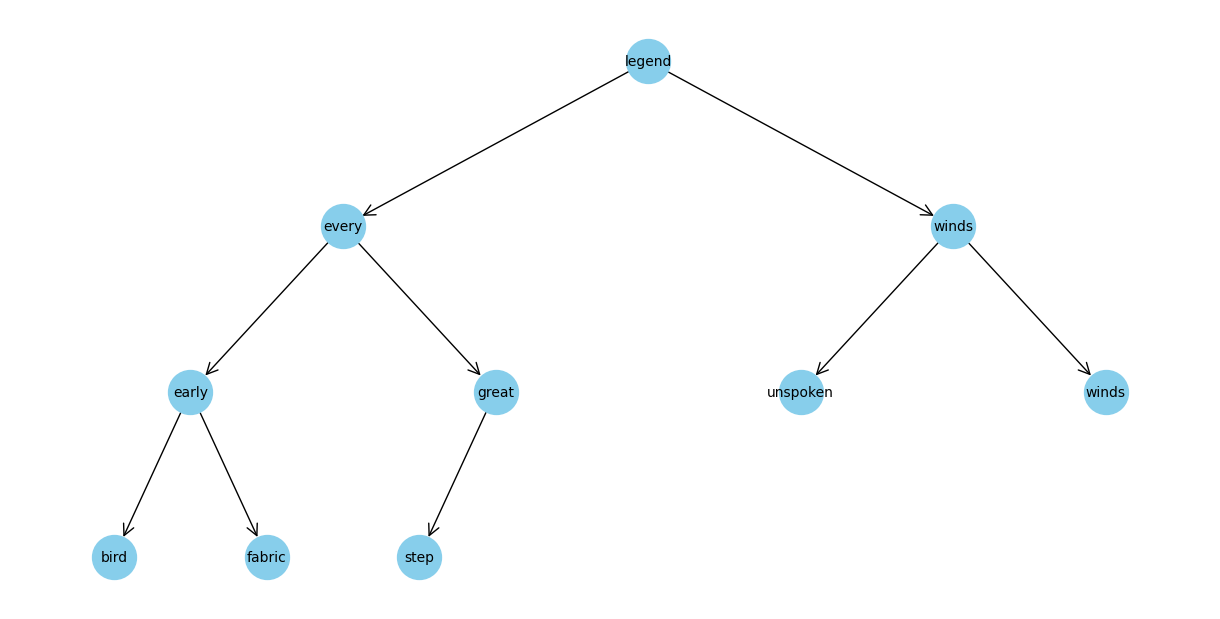

In [153]:
plot_binary_tree(test)

{'Fontys ICT': {'A few': 50.0, 'None': 50.0},
 'Fontys ICM': {'A few': 36.36363636363637, 'None': 63.63636363636363},
 'Fontys International Business': {'A few': 40.0, 'None': 60.0}}